In [7]:
# 지하철역
# 1-1
import numpy as np
import pandas as pd
import csv

SeoulFile = r"C:\Hwan\Numpy\DAY01\WORK\과제1-데이터예시(seoul.csv).csv"

Seoul = pd.read_csv(SeoulFile)

Seoul

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차객수
0,20240701,9호선2~3단계,석촌고분,7665,7414,15079
1,20240701,중앙선,도농,12178,10957,23135
2,20240701,중앙선,구리,14053,14085,28138
3,20240701,4호선,길음,22687,22215,44902
4,20240701,분당선,복정,1,0,1
...,...,...,...,...,...,...
19098,20240731,7호선,신풍,11494,10664,22158
19099,20240731,7호선,대림(구로구청),9328,9366,18694
19100,20240731,7호선,남구로,15284,16072,31356
19101,20240731,7호선,가산디지털단지,47493,47452,94945


In [8]:
Seoul = Seoul.drop(columns = ["사용일자", "노선명"])
Seoul = Seoul.drop(columns = ["승차총승객수", "하차총승객수"])

Seoul

,역명,승하차객수
0,석촌고분,15079
1,도농,23135
2,구리,28138
3,길음,44902
4,복정,1
...,...,...
19098,신풍,22158
19099,대림(구로구청),18694
19100,남구로,31356
19101,가산디지털단지,94945


In [16]:
# 1-2 역별 이용객 수의 표준편차

aver = np.average(Seoul["승하차객수"])
total = 0

for num in Seoul["승하차객수"]:
    boonsan = num - aver
    std = (boonsan)**2/len(Seoul["승하차객수"])
    total += std

print(f"역별 이용객수의 표준편차 : {(total)**0.5}")

std = np.std(Seoul["승하차객수"])
print(std)
    

역별 이용객수의 표준편차 : 22505.40802086939
22505.408020869436


In [50]:
# 1-3, 1-5 가장 많은 이용객이 있는 역의 이용수 + 역의 이름

print(Seoul["승하차객수"].sort_values(ascending= False))
Seoul["승하차객수"].idxmax()

max_station = Seoul.iloc[[7523]]["역명"]
max_people =  Seoul.iloc[[7523]]["승하차객수"]
print(f"가장 많은 이용객이 있는 역의 이용객 수 : {max_people}")
print(f"가장 많은 이용객이 있는 역의 이름 :  {max_station}")

7523     195725
7223     194290
11369    191990
2691     191965
15438    187884
          ...  
11170         1
7505          1
2420          1
14988         1
3729          1
Name: 승하차객수, Length: 19103, dtype: int64
가장 많은 이용객이 있는 역의 이용객 수 : 7523    195725
Name: 승하차객수, dtype: int64
가장 많은 이용객이 있는 역의 이름 :  7523    홍대입구
Name: 역명, dtype: object


In [69]:
# 1-4, 1-6 가장 적은 이용객이 있는 역의 이용수 + 역의 이름

mini_station = Seoul.loc[Seoul['승하차객수'].idxmin()]

print(f"가장 적은 이용객 수: {mini_station['승하차객수']}")
print(f"해당 지하철 역: {mini_station['역명']}역")

가장 적은 이용객 수: 1
해당 지하철 역: 복정역


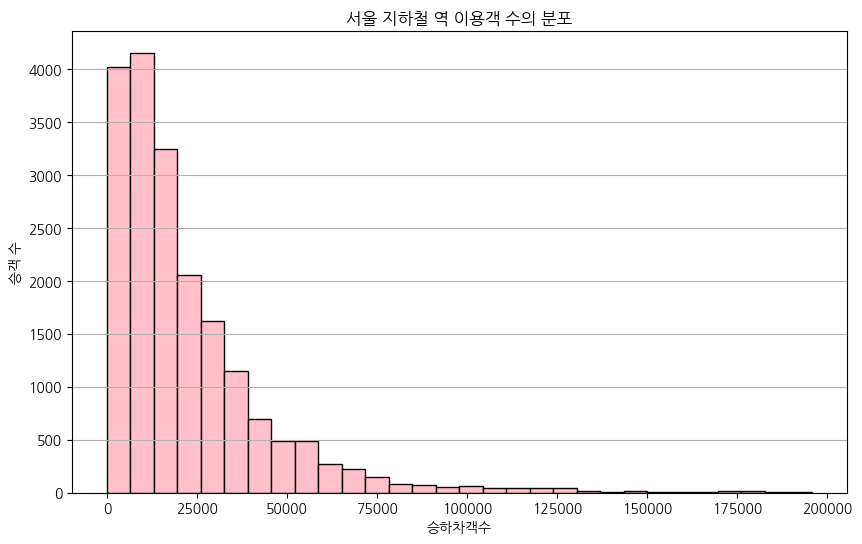

In [72]:
# 1-7 이용객 수의 분포를 히스토그램

import matplotlib.pyplot as plt
import koreanize_matplotlib 

plt.figure(figsize = (10, 6))
plt.hist(Seoul['승하차객수'], bins=30, color='pink', edgecolor='black')
plt.title('서울 지하철 역 이용객 수의 분포')
plt.xlabel('승하차객수')
plt.ylabel('승객 수')
plt.grid(axis='y')
plt.show()


In [75]:
# 2 Boston House의 가격
# 2-1 주택 가격의 평균

BostonFile = r"C:\Hwan\Numpy\DAY01\WORK\boston.csv"

Boston = pd.read_csv(BostonFile)

Boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [76]:
boston = Boston.drop(columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"])

boston 

,RAD,MEDV
0,1,24.0
1,2,21.6
2,2,34.7
3,3,33.4
4,3,36.2
...,...,...
501,1,22.4
502,1,20.6
503,1,23.9
504,1,22.0


In [77]:
boston = boston.drop(columns = ["RAD"])

In [78]:
boston

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [85]:
# 2-1 주택 가격의 평균
avg = np.average(boston["MEDV"])

print(f"보스턴 주택 가격의 평균 : {avg:.2f}")

보스턴 주택 가격의 평균 : 22.53


In [86]:
# 2-2 보스턴 주택 가격의 중앙값
mid = np.median(boston["MEDV"])

print(f"보스턴 주택 가격의 중앙값 : {mid:.2f}")

보스턴 주택 가격의 중앙값 : 21.20


In [88]:
# 2-3 보스턴 주택 가격의 표준편차
std = np.std(boston["MEDV"])

print(f"보스턴 주택 가격의 표준편차 : {std:.2f}")

보스턴 주택 가격의 표준편차 : 9.19


In [90]:
# 2-4 보스턴 주택 가격의 최대값
maxx = np.max(boston["MEDV"])

print(f"보스턴 주택 가격의 최대값 : {maxx:.2f}")

보스턴 주택 가격의 최대값 : 50.00


In [92]:
# 2-5 보스턴 주택 가격의 최소값
mini = np.min(boston["MEDV"])

print(f"보스턴 주택 가격의 최소값 : {mini:.2f}")

보스턴 주택 가격의 최소값 : 5.00


In [98]:
# 2-6 보스턴 주택 가격의 최빈값
from scipy import stats

mode = stats.mode(boston["MEDV"])

print(f'보스턴 주택 가격의 최빈값 : {mode[0]}')

보스턴 주택 가격의 최빈값 : 50.0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

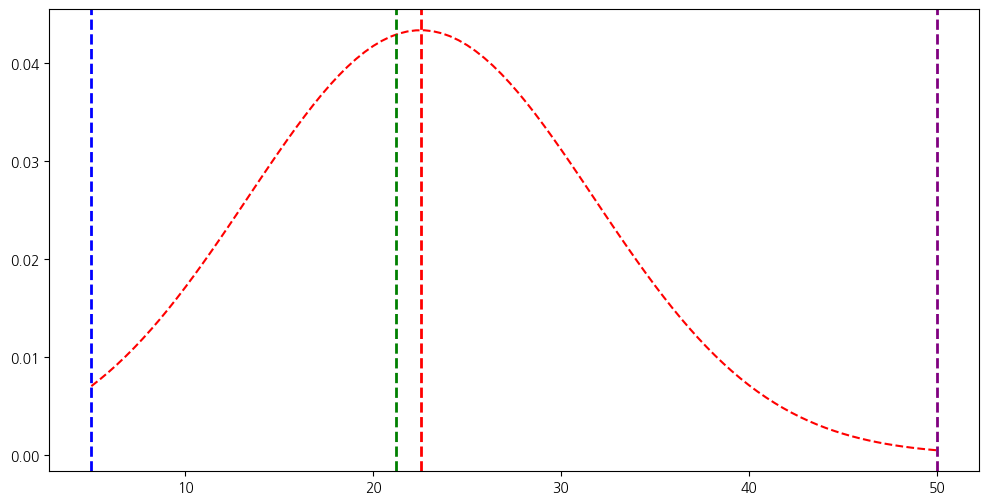

In [104]:
# 2-7 주택 가격의 분포 시각화
from scipy.stats import norm

plt.figure(figsize=(12, 6))

x = np.linspace(boston["MEDV"].min(), boston["MEDV"].max(), 100)
p = norm.pdf(x, boston["MEDV"].mean(), boston["MEDV"].std())

plt.plot(x, p, 'r--', label='정규분포 곡선')

plt.axvline(avg, color='red', linestyle='--', linewidth=2, label=f'평균: {avg:.2f}')
plt.axvline(mid, color='green', linestyle='--', linewidth=2, label=f'중앙값: {mid:.2f}')
plt.axvline(maxx, color='purple', linestyle='--', linewidth=2, label=f'최대값: {maxx:.2f}')
plt.axvline(mini, color='blue', linestyle='--', linewidth=2, label=f'최소값: {mini:.2f}')
plt.axvline(mode, color='orange', linestyle='--', linewidth=2, label=f'최빈값: {mode}')
plt.text(maxx, 0.015, f'표준편차: {std:.2f}', color='black', verticalalignment='center')

plt.title('보스턴 주택 가격')
plt.xlabel('주택 가격')
plt.ylabel('분포')
plt.legend()
plt.show()